In [ ]:
# ETL Midterm - Transform Phase
# Author: <Your First Name>
# Student ID Last 3 Digits: <IDLast3Digits>

import pandas as pd
import os
# transformed directory       
os.makedirs("transformed", exist_ok=True)

# Load the raw data
raw_df = pd.read_csv("data/raw_data.csv")
incremental_df = pd.read_csv("data/incremental_data.csv")

# Helper function to apply 4+ transformations
def transform(df, label=""):
    df = df.copy()

    print(f"\n--- {label} BEFORE TRANSFORMATIONS ---")
    print(df.head())

    # 1. Remove duplicates
    before = df.shape[0]
    df = df.drop_duplicates()
    after = df.shape[0]
    print(f"{label}: Removed {before - after} duplicate rows.")

    # 2. Handle missing values (drop rows with any NaN)
    before_na = df.isnull().sum()
    df = df.dropna()
    after_na = df.isnull().sum()
    print(f"{label}: Missing values before:\n{before_na}")
    print(f"{label}: Missing values after:\n{after_na}")

    # 3. Add total_price = quantity * unit_price (only if both columns exist)
    if 'quantity' in df.columns and 'unit_price' in df.columns:
        try:
            df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
            df['unit_price'] = pd.to_numeric(df['unit_price'], errors='coerce')
            df['total_price'] = df['quantity'] * df['unit_price']
            print(f"{label}: Added 'total_price' column.")
        except Exception as e:
            print(f"{label}: Could not calculate total_price: {e}")

    # 4. Convert order_date column to datetime (only if it exists)
    if 'order_date' in df.columns:
        df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
        print(f"{label}: Converted 'order_date' to datetime.")

    # 5. Optional categorization: spending_category
    if 'total_price' in df.columns:
        df['spending_category'] = pd.cut(
            df['total_price'],
            bins=[0, 100, 500, 1000, float('inf')],
            labels=['Low', 'Medium', 'High', 'Very High']
        )
        print(f"{label}: Categorized 'spending_category'.")

    print(f"\n--- {label} AFTER TRANSFORMATIONS ---")
    print(df.head())

    return df

# Apply transformations
transformed_full = transform(raw_df, label="FULL DATA")
transformed_incremental = transform(incremental_df, label="INCREMENTAL DATA")

# Save results
transformed_full.to_csv("transformed/transformed_full.csv", index=False)
transformed_incremental.to_csv("transformed/transformed_incremental.csv", index=False)

print("✅ Transformations complete and files saved.")



--- FULL DATA BEFORE TRANSFORMATIONS ---
   order_id customer_name product  quantity  unit_price  order_date region
0         1         Diana  Tablet       NaN       500.0  2024-01-20  South
1         2           Eve  Laptop       NaN         NaN  2024-04-29  North
2         3       Charlie  Laptop       2.0       250.0  2024-01-08    NaN
3         4           Eve  Laptop       2.0       750.0  2024-01-07   West
4         5           Eve  Tablet       3.0         NaN  2024-03-07  South
FULL DATA: Removed 1 duplicate rows.
FULL DATA: Missing values before:
order_id          0
customer_name     1
product           0
quantity         26
unit_price       35
order_date        1
region           25
dtype: int64
FULL DATA: Missing values after:
order_id         0
customer_name    0
product          0
quantity         0
unit_price       0
order_date       0
region           0
dtype: int64
FULL DATA: Added 'total_price' column.
FULL DATA: Converted 'order_date' to datetime.
FULL DATA: Categori

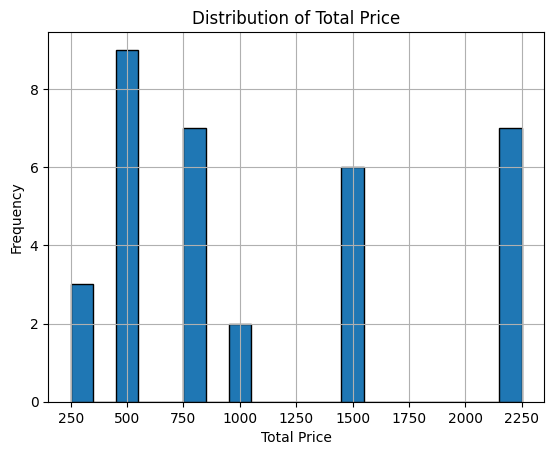

In [7]:
# Visualization of the transformed data
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("transformed/transformed_full.csv")
df["total_price"].hist(bins=20, edgecolor="black")
plt.title("Distribution of Total Price")
plt.xlabel("Total Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
